In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')

In [3]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [4]:
df['Total_Pollution_Index'] = df['Air_Pollution_Index'] + df['Water_Pollution_Index'] + df['Soil_Pollution_Index']
df['Energy_Recovery_Rate'] = df['Energy_Recovered (in GWh)'] / df['Industrial_Waste (in tons)']
df['Renewable_Energy_Ratio'] = df['Renewable_Energy (%)'] / 100

In [5]:
df['Pollution_Severity'] = pd.qcut(df['Total_Pollution_Index'], q=3, labels=['Low', 'Medium', 'High'])

In [6]:
le = LabelEncoder()
df['Country_Encoded'] = le.fit_transform(df['Country'])

In [7]:
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
            'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
            'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
            'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
            'GDP_Per_Capita (in USD)', 'Total_Pollution_Index', 'Energy_Recovery_Rate',
            'Renewable_Energy_Ratio']

X = df[features]
y = df['Pollution_Severity']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler_nb = MinMaxScaler()
X_train_nb = scaler_nb.fit_transform(X_train)
X_test_nb = scaler_nb.transform(X_test)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_nb, y_train)
y_pred_nb = nb_classifier.predict(X_test_nb)

In [12]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal K value: {optimal_k}")

knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

Optimal K value: 10


In [13]:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Low', 'Medium', 'High'], 
                yticklabels=['Low', 'Medium', 'High'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_weighted': f1_score(y_true, y_pred, average='weighted')
    }


Naive Bayes Evaluation:
Accuracy: 0.48333333333333334

Classification Report:
              precision    recall  f1-score   support

        High       0.44      0.78      0.56        18
         Low       0.58      0.83      0.68        18
      Medium       0.00      0.00      0.00        24

    accuracy                           0.48        60
   macro avg       0.34      0.54      0.41        60
weighted avg       0.30      0.48      0.37        60


Confusion Matrix:


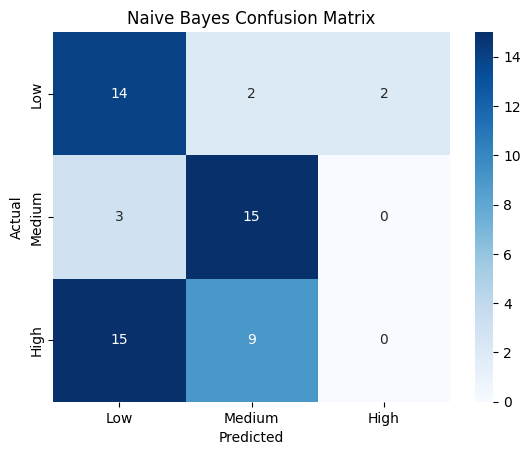


K-Nearest Neighbors Evaluation:
Accuracy: 0.7333333333333333

Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.89      0.78        18
         Low       0.74      0.94      0.83        18
      Medium       0.79      0.46      0.58        24

    accuracy                           0.73        60
   macro avg       0.74      0.76      0.73        60
weighted avg       0.74      0.73      0.71        60


Confusion Matrix:


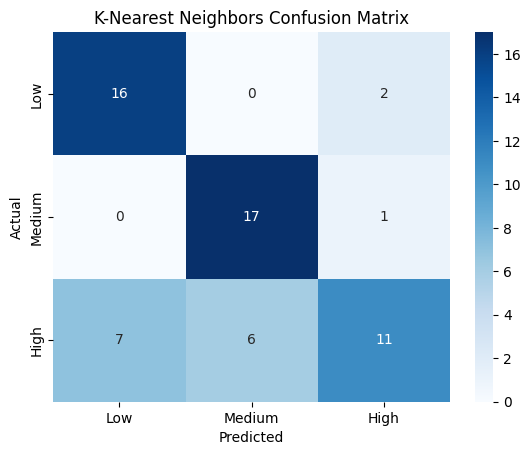


Decision Tree Evaluation:
Accuracy: 0.9666666666666667

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.94      0.97        18
         Low       1.00      0.94      0.97        18
      Medium       0.92      1.00      0.96        24

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix:


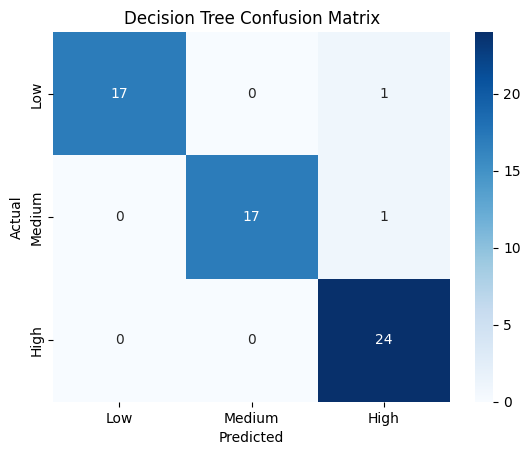

In [15]:
nb_metrics = evaluate_model(y_test, y_pred_nb, "Naive Bayes")
knn_metrics = evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

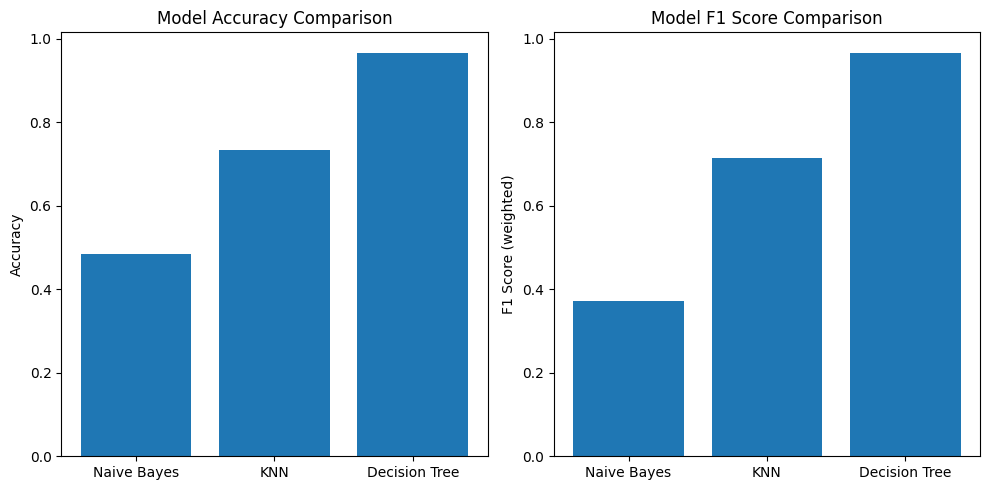

In [16]:
models = ['Naive Bayes', 'KNN', 'Decision Tree']
accuracies = [nb_metrics['accuracy'], knn_metrics['accuracy'], dt_metrics['accuracy']]
f1_scores = [nb_metrics['f1_weighted'], knn_metrics['f1_weighted'], dt_metrics['f1_weighted']]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(models, f1_scores)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score (weighted)')

plt.tight_layout()
plt.show()

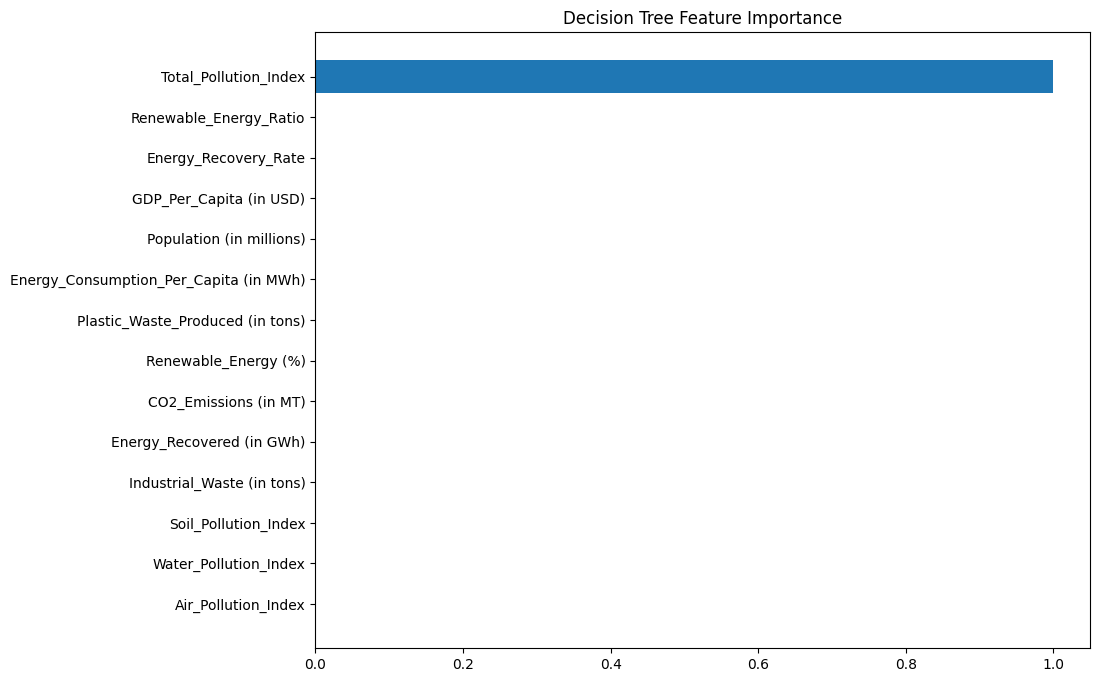

In [17]:
feature_importance = dt_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.title('Decision Tree Feature Importance')
plt.show()

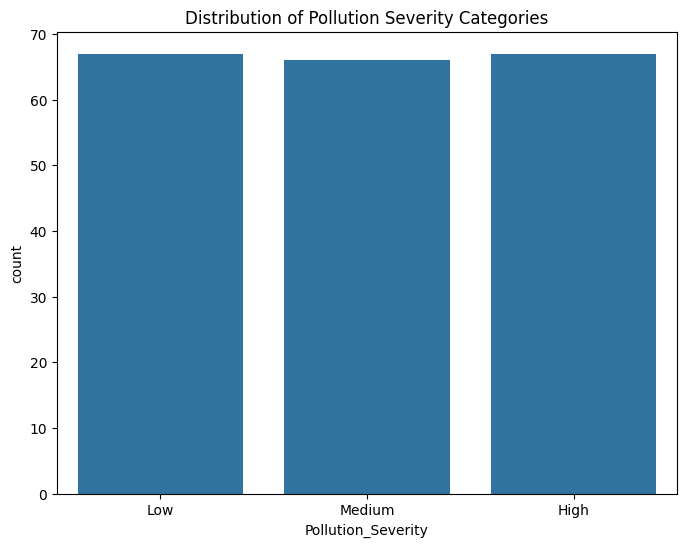

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pollution_Severity', data=df)
plt.title('Distribution of Pollution Severity Categories')
plt.show()

In [19]:
top_polluted = df.nlargest(10, 'Total_Pollution_Index')[['Country', 'Total_Pollution_Index', 'Pollution_Severity']]
print("\nTop 10 Most Polluted Countries:")
print(top_polluted)


Top 10 Most Polluted Countries:
                      Country  Total_Pollution_Index Pollution_Severity
94           Saint Barthelemy                 561.11               High
152                Mauritania                 558.05               High
158                   Bolivia                 544.49               High
7    Central African Republic                 531.05               High
136          Christmas Island                 527.85               High
182          Papua New Guinea                 526.98               High
54              Guinea-Bissau                 526.06               High
103                   Morocco                 522.75               High
180            Norfolk Island                 522.49               High
183               Philippines                 520.91               High
